In [19]:
# 한글 폰트 설치 + 캐시 삭제
!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped dire

In [1]:
#런타임 재시작 (Runtime → Restart runtime) 후에 다시 임포트

import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 기본 설정
!pip install konlpy

import nltk
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from konlpy.tag import Okt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# N-gram
text = "I love natural language processing and I love Python"

tokens = text.split()
bigrams = list(zip(tokens[:-1], tokens[1:]))
print("Bigrams:", bigrams)
print("\n")

# 조건부 확률
words_dict = {}
for i in range(len(tokens)-2):
    bi = " ".join(tokens[i:i+2])
    words_dict.setdefault(bi, []).append(tokens[i+2])

print("Conditional Probabilities:", words_dict)

Bigrams: [('I', 'love'), ('love', 'natural'), ('natural', 'language'), ('language', 'processing'), ('processing', 'and'), ('and', 'I'), ('I', 'love'), ('love', 'Python')]


Conditional Probabilities: {'I love': ['natural', 'Python'], 'love natural': ['language'], 'natural language': ['processing'], 'language processing': ['and'], 'processing and': ['I'], 'and I': ['love']}


In [4]:
# Bag of Words (BoW)
corpus = [
    "먹고 싶은 사과",
    "먹고 싶은 포도",
    "길고 노란 바나나 바나나",
    "저는 과일이 좋아요"
]

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus).toarray()
print("BoW Matrix:\n", bow)
print("\n")
print("Vocabulary:", vectorizer.vocabulary_)


BoW Matrix:
 [[0 0 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 0 1 0 0 1]
 [0 1 1 0 2 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 0]]


Vocabulary: {'먹고': 3, '싶은': 6, '사과': 5, '포도': 9, '길고': 1, '노란': 2, '바나나': 4, '저는': 7, '과일이': 0, '좋아요': 8}


In [5]:
# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus).toarray()
print("TF-IDF Matrix:\n", tfidf_matrix)
print("\n")
print("Vocabulary:", tfidf.vocabulary_)

TF-IDF Matrix:
 [[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.         0.        ]
 [0.         0.         0.         0.52640543 0.         0.
  0.52640543 0.         0.         0.66767854]
 [0.         0.40824829 0.40824829 0.         0.81649658 0.
  0.         0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027 0.        ]]


Vocabulary: {'먹고': 3, '싶은': 6, '사과': 5, '포도': 9, '길고': 1, '노란': 2, '바나나': 4, '저는': 7, '과일이': 0, '좋아요': 8}


In [6]:
# 한국어 형태소 분석 (Okt)
okt = Okt()
doc = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
tokens = okt.morphs(doc)
print("형태소 분석 결과:", tokens)
print("\n")

# BoW 직접 구현
word_to_index = {}
bow_vec = []

for word in tokens:
    if word not in word_to_index:
        word_to_index[word] = len(word_to_index)
        bow_vec.insert(len(word_to_index)-1, 1)
    else:
        idx = word_to_index.get(word)
        bow_vec[idx] += 1

print("Word to Index:", word_to_index)
print("\n")
print("BoW Vector:", bow_vec)

형태소 분석 결과: ['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다', '.']


Word to Index: {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '.': 10}


BoW Vector: [1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1]


In [7]:
# Word2Vec (gensim 라이브러리 활용)
!pip install gensim

from gensim.models import Word2Vec

sentences = [
    ["나는", "밥을", "먹는다"],
    ["너는", "밥을", "먹었다"],
    ["그는", "사과를", "좋아한다"],
    ["우리는", "파이썬을", "공부한다"]
]

model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0) # sg=0 → CBOW, sg=1 → Skip-gram

similar_words = model.wv.most_similar("밥을")

print("\n")
print("'밥을'과 유사한 단어들:\n")
for word, score in similar_words:
    print(f"{word} : {score:.4f}")



'밥을'과 유사한 단어들:

먹었다 : 0.1320
파이썬을 : 0.1267
먹는다 : 0.0998
공부한다 : 0.0424
사과를 : 0.0124
나는 : -0.0126
우리는 : -0.0145
너는 : -0.0561
그는 : -0.0597
좋아한다 : -0.1182


In [9]:
from sklearn.decomposition import PCA

# Word2Vec에서 단어 리스트와 벡터 불러오기
words = list(model.wv.index_to_key)   # 학습된 단어들
X = model.wv[words]                   # 해당 벡터들

# PCA로 2차원 축소
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

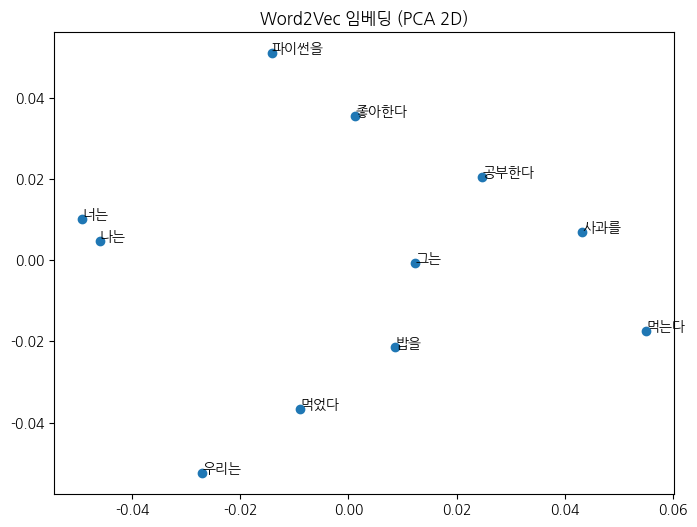

In [10]:
# 시각화 (Word2Vec 임베딩 공간 일부)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 시각화
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_reduced[i,0], X_reduced[i,1]))
plt.title("Word2Vec 임베딩 (PCA 2D)")
plt.show()